In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv('Data/winequality-white.csv', sep=';')


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)

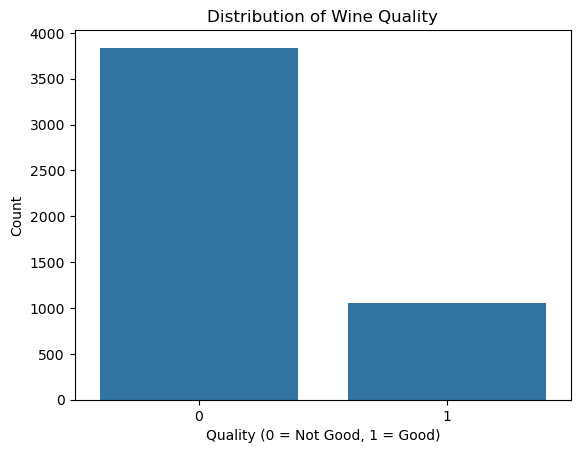

In [12]:
sns.countplot(x='quality_binary', data=df)
plt.title("Distribution of Wine Quality")
plt.xlabel('Quality (0 = Not Good, 1 = Good)')
plt.ylabel('Count')
plt.show()


In [14]:
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Compare data before and after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:\n", X['pH'].head(5))
print("After Scaling:\n", X_scaled_df['pH'].head(5))

Before Scaling:
 0    3.00
1    3.30
2    3.26
3    3.19
4    3.19
Name: pH, dtype: float64
After Scaling:
 0   -1.246921
1    0.740029
2    0.475102
3    0.011480
4    0.011480
Name: pH, dtype: float64


In [22]:
X_scaled_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,1.160543e-17,-1.066249e-16,3.133467e-16,-1.015476e-17,-4.642174e-17,3.247201e-14,-1.183754e-15,-8.218098e-16,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00


The mean is now close to 0 and the standard deviation is close to 1. This is a good thing because it means that the data is standardized.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [26]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [28]:
# Define parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Use GridSearchCV to find the optimal K
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# Get the optimal K
optimal_k = knn_gscv.best_params_['n_neighbors']
print(f"Optimal K: {optimal_k}")


Optimal K: 1


In [29]:
# Train the model with the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1037  104]
 [ 110  219]]


In [34]:
# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

In [35]:
# Train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [36]:
# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


In [37]:
# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Linear Kernel - Accuracy: {accuracy_linear}")
print("Linear Kernel - Confusion Matrix:")
print(cm_linear)

print(f"RBF Kernel - Accuracy: {accuracy_rbf}")
print("RBF Kernel - Confusion Matrix:")
print(cm_rbf)

Linear Kernel - Accuracy: 0.7761904761904762
Linear Kernel - Confusion Matrix:
[[1141    0]
 [ 329    0]]
RBF Kernel - Accuracy: 0.8224489795918367
RBF Kernel - Confusion Matrix:
[[1102   39]
 [ 222  107]]


In [38]:
# Summary table of accuracy scores
summary = {
    'Classifier': ['KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)'],
    'Accuracy': [accuracy, accuracy_linear, accuracy_rbf]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

            Classifier  Accuracy
0                  KNN  0.854422
1  SVM (Linear Kernel)  0.776190
2     SVM (RBF Kernel)  0.822449


## Reflection

1. KNN performed the best based on accuracy.

2. I would choose KNN as it has the most true positives and true negatives aswell as best accuracy. Linear kernel confusion matrix had 0 false positives and 0 true positives which is not good.

3. Probably not as red wine and white wine have different properties and it would be better to train the model on each type of wine separately. Since they have many of the same features, you could maybe take the same model as a starting point and then fine tune it for each type of wine.

4. The teqniques learned in this lab are very useful and can be applied to many different datasets and machine learning problems. KNN and SVM are very useful algorithms to know and understand. Data standardization is also important because it can help improve the accuracy of the model. Accuracy and Confusion matrices are also very useful to know and understand as they can help you evaluate the performance of your model.

